# Traffic Sign Clustering

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import LeaveOneOut

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import silhouette_score

In [2]:
X=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_train_all.csv')
Xlabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_train_all.csv')
Y=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_test_all.csv')
Ylabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_test_all.csv')

In [3]:
X.shape

(9690, 2304)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [5]:
X1 = X.iloc[:,0:2304]  #independent columns
y1 = Xlabel.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScoresAll2 = featureScores.nlargest(2,'Score')
featureScoresAll2
featureScoresAll3 = featureScores.nlargest(3,'Score')
featureScoresAll3
featureScoresAll4 = featureScores.nlargest(4,'Score')
featureScoresAll4
featureScoresAll5 = featureScores.nlargest(5,'Score')
featureScoresAll5

,Specs,Score
1263,1263,150633.369191
1264,1264,148051.674998
1216,1216,144958.677289
1311,1311,144287.318409
1215,1215,140869.000438


In [6]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 1263], X[:, 1264],c=y, s=1) #s is the size of dots.
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

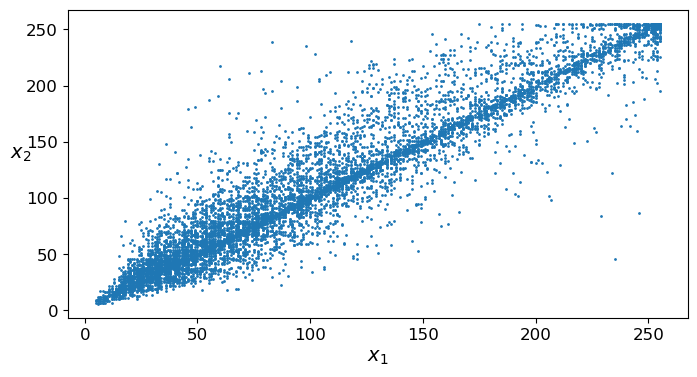

In [220]:
XTArr=np.array(X)
YTArr=np.array(Xlabel)
plt.figure(figsize=(8, 4))
plot_clusters(XTArr)
plt.show()

In [8]:
def get_best_feature_dataframe(index_X, data):
    arr = index_X.to_numpy()[:,0]    
    return data.loc[:,arr]

In [9]:
feature_df = get_best_feature_dataframe(featureScoresAll3,X)
feature_df
XTArrBest  = feature_df.to_numpy()
XTArrBest
feature_df

,1263,1264,1216
0,226.0,234.0,231.0
1,123.0,194.0,199.0
2,208.0,227.0,225.0
3,191.0,225.0,230.0
4,209.0,224.0,202.0
...,...,...,...
9685,19.0,38.0,22.0
9686,20.0,60.0,30.0
9687,18.0,80.0,36.0
9688,17.0,58.0,25.0


# Employ PCA to find the subset of components, which explains the variance in the data

In [10]:
pca = PCA()
pca.fit(XTArrBest)
pca.explained_variance_ratio_

array([0.97732422, 0.01594716, 0.00672863])

In [12]:
pca.explained_variance_ratio_

array([0.97732422, 0.01594716, 0.00672863])

Text(0, 0.5, 'Cumulative Explained Variance')

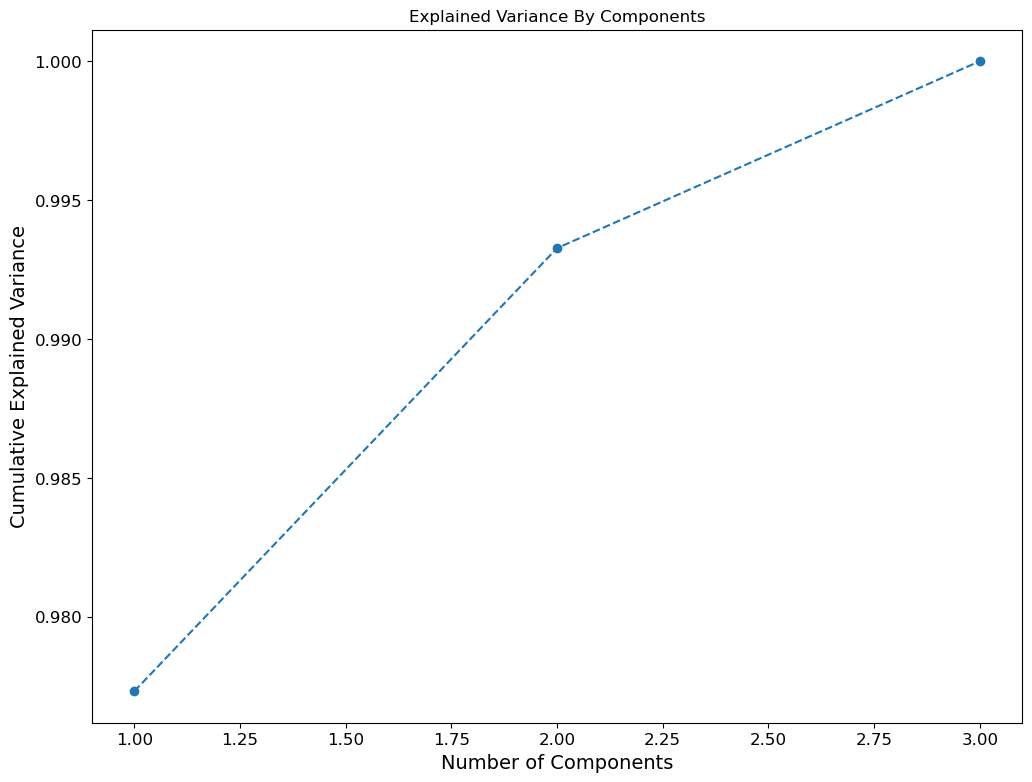

In [14]:
plt.figure(figsize=(12,9))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance By Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Number of Components : 10- 83% variance

In [15]:
pca= PCA(n_components = 2)
pca.fit(XTArrBest)

PCA(n_components=2)

In [16]:
pca.explained_variance_ratio_

array([0.97732422, 0.01594716])

In [272]:
pca.transform(XTArrBest)

array([[ 194.77432897,   -3.15925599],
       [  93.70623254,  -57.35349399],
       [ 176.87303316,  -12.39400109],
       ...,
       [-126.57609142,  -21.78635821],
       [-146.26644018,  -11.45549593],
       [-141.60948721,  -14.56713952]])

In [17]:
scores_pca = pca.transform(XTArrBest)
scores_pca.shape


(9690, 2)

# K-means clustering with PCA

In [274]:
#fitting KMeans using the transformed data from PCA
wcss = []
pred= []
ccent=[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    ypred = kmeans_pca.fit_predict(scores_pca)
    pred.append(ypred)
    print(ypred is kmeans_pca.labels_)
    wcss.append(kmeans_pca.inertia_)
    ccent.append(kmeans_pca.cluster_centers_)

/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True
True


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True
True


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True
True


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


True


In [275]:
ccent

[array([[-5.45409378e-14, -3.44968865e-15]]),
 array([[ 1.60719930e+02,  2.74760776e-01],
        [-8.50005058e+01, -1.45313683e-01]]),
 array([[  19.27176463,   -2.36194669],
        [-116.80407153,    0.73942511],
        [ 197.8620502 ,    1.45890469]]),
 array([[ -31.24779594,   -1.38838312],
        [-130.744802  ,    1.05778849],
        [ 216.32338798,    2.17571295],
        [  85.61683289,   -2.49590405]]),
 array([[-141.73026812,    1.49984851],
        [ 220.02005044,    2.00602484],
        [  10.47813585,   -2.04965609],
        [ 106.86372678,   -1.85776868],
        [ -69.24605856,   -0.79504093]]),
 array([[-1.46575550e+02,  1.51502482e+00],
        [ 1.39934081e+02,  7.34877362e-02],
        [ 2.26757094e+02,  1.93073196e+00],
        [-1.21078797e+01, -1.82233544e+00],
        [-8.25403969e+01, -2.23689870e-01],
        [ 6.29447257e+01, -2.92171429e+00]]),
 array([[ -52.34917377,   -1.28778606],
        [ 227.54239176,    1.88999079],
        [-103.80098819,    0.359

In [276]:
kmeans_pca

KMeans(n_clusters=10, random_state=42)

In [277]:
XTArrBest.shape

(9690, 3)

# # #plotting the WCSS against the number of components on a graph.

/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


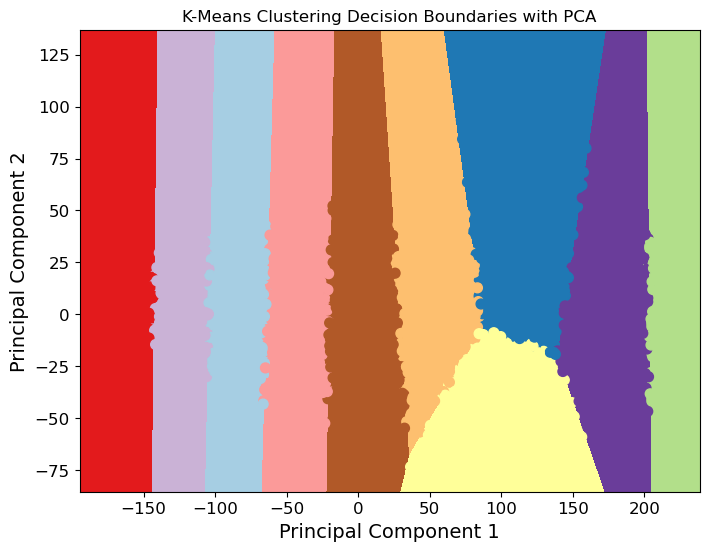

In [278]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(XTArrBest)

# Create and fit a K-Means model
n_clusters = 10  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)

# Step size for the mesh grid
h = 0.02  # Adjust this based on your data and preferences

# Plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s=50, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Decision Boundaries with PCA')
plt.show()

Text(0, 0.5, 'WCSS')

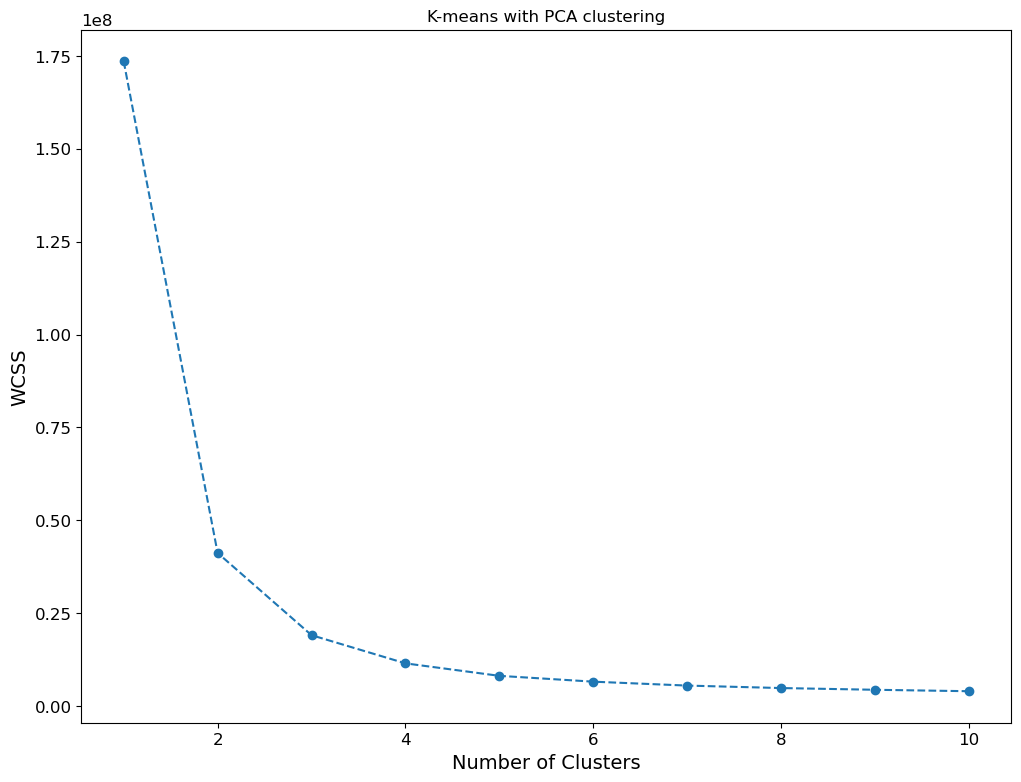

In [279]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('K-means with PCA clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [280]:
kmeans_pca = KMeans(n_clusters = 10, init = 'k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(algorithm='auto', n_clusters=10, n_init=10)

In [281]:
X_pca_kmeans = pd.concat([feature_df.reset_index( drop= True), pd.DataFrame(scores_pca)], axis= 1)
#X_pca_kmeans.columns.values[-10:] = ['Component 1','Component 2','Component 3','Component 4',
#                                     'Component 5','Component 6','Component 7','Component 8',
#                                    'Component 9','Component 10']
X_pca_kmeans.columns.values[-2:] = ['Component 1','Component 2']
X_pca_kmeans['Segment K-means PCA'] =kmeans_pca.labels_
X_pca_kmeans.tail()

,1263,1264,1216,Component 1,Component 2,Segment K-means PCA
9685,19.0,38.0,22.0,-158.483439,-3.784146,3
9686,20.0,60.0,30.0,-140.509159,-12.393653,8
9687,18.0,80.0,36.0,-126.576091,-21.786358,8
9688,17.0,58.0,25.0,-146.266440,-11.455496,3
9689,16.0,66.0,26.0,-141.609487,-14.567140,8


In [282]:
X_pca_kmeans['Segment']= X_pca_kmeans['Segment K-means PCA'].map({0:'First', 1: 'Second',2:'Third', 3: 'Fourth',
                                            4:'Fifth', 5: 'Sixth', 6:'Seventh', 7: 'Eighth',
                                            8:'Nineth', 9 : 'Tenth'})

In [283]:
X_pca_kmeans.tail()

,1263,1264,1216,Component 1,Component 2,Segment K-means PCA,Segment
9685,19.0,38.0,22.0,-158.483439,-3.784146,3,Fourth
9686,20.0,60.0,30.0,-140.509159,-12.393653,8,Nineth
9687,18.0,80.0,36.0,-126.576091,-21.786358,8,Nineth
9688,17.0,58.0,25.0,-146.266440,-11.455496,3,Fourth
9689,16.0,66.0,26.0,-141.609487,-14.567140,8,Nineth


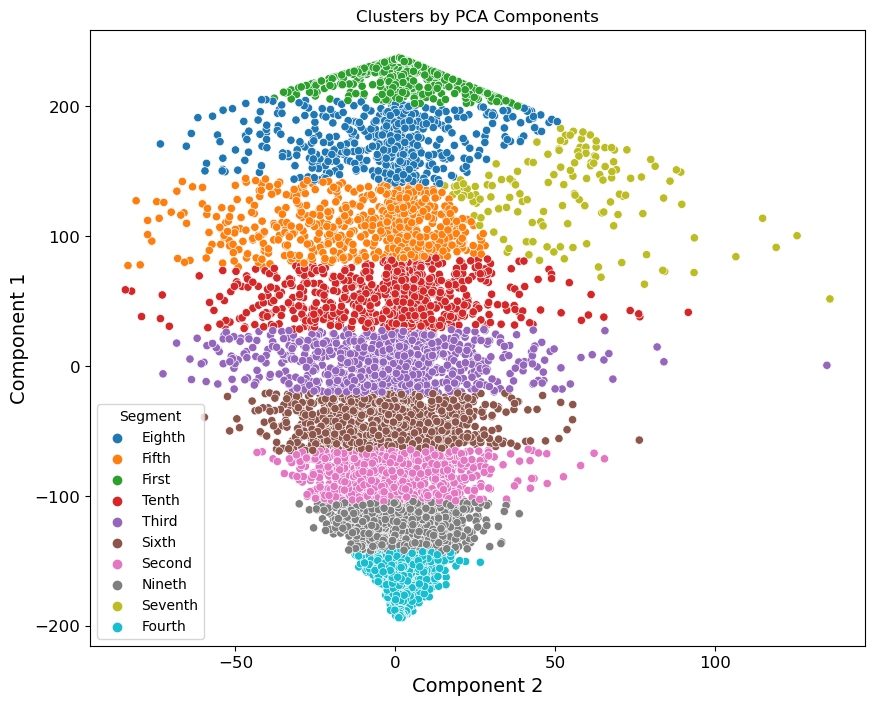

In [284]:
x_axis=X_pca_kmeans['Component 2']
y_axis=X_pca_kmeans['Component 1']
plt.figure(figsize= (10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = X_pca_kmeans['Segment'])
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.title('Clusters by PCA Components')
plt.show()

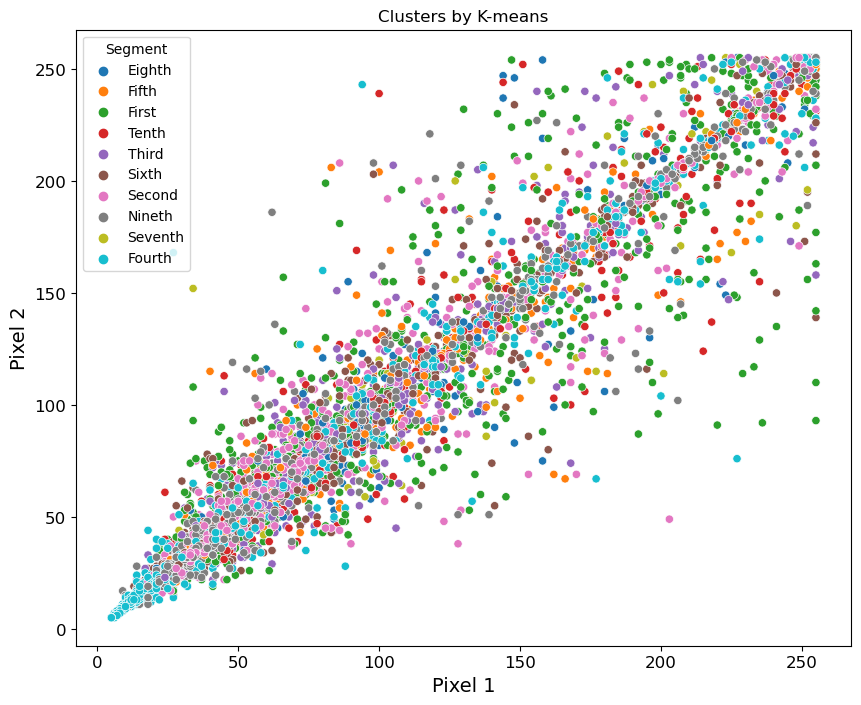

In [285]:
x_axis=X['0']
y_axis=X['1']
plt.figure(figsize= (10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = X_pca_kmeans['Segment'])
plt.xlabel('Pixel 1')
plt.ylabel('Pixel 2')
plt.title('Clusters by K-means')
plt.show()

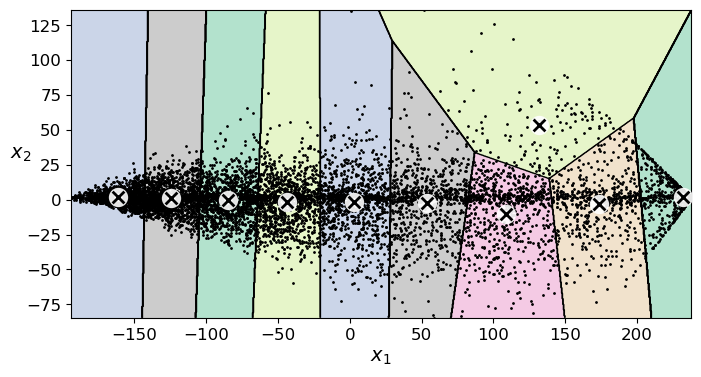

In [287]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_pca, scores_pca)
plt.show()

[1833.67865378 -327.4322801  -247.7431902  -608.48372704 -348.79357747
  651.33683823  303.65556582  -10.80059638 -408.75420517  -79.92552973]
0    0
Name: 0, dtype: int64


array([0])

In [122]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Clustering Using EM

(9690, 2)
(9690, 10)


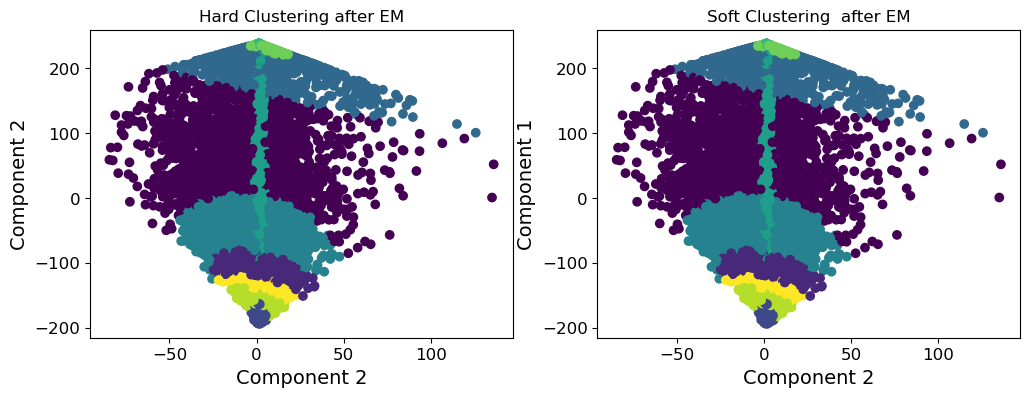

In [68]:
from scipy.stats import multivariate_normal

# Generate synthetic data
np.random.seed(0)
n_samples = 9690
n_features = 2
n_clusters = 10
X = np.random.randn(n_samples, n_features)
X[:100, :] += 5
X[100:200, :] -= 5
print(scores_pca.shape)
# Initialize parameters for the GMM
n_components = n_clusters
n_iter = 100
tolerance = 1e-3

# Randomly initialize cluster parameters: means, covariances, and weights
np.random.seed(0)
means = scores_pca[np.random.choice(n_samples, n_components, replace=False)]
covariances = [np.identity(n_features) for _ in range(n_components)]
weights = np.ones(n_components) / n_components

for _ in range(n_iter):
    # Expectation step (E-step)
    posterior_probabilities = np.zeros((n_samples, n_components))
    
    for k in range(n_components):
        posterior_probabilities[:, k] = weights[k] * multivariate_normal.pdf(scores_pca, mean=means[k], cov=covariances[k])
       
        
    posterior_sums = posterior_probabilities.sum(axis=1, keepdims=True)
    posterior_sums[posterior_sums == 0] = 1  # Prevent division by zero
    posterior_probabilities /= posterior_sums
    
    # Maximization step (M-step)
    for k in range(n_components):
        Nk = posterior_probabilities[:, k].sum()
        means[k] = np.sum(scores_pca * posterior_probabilities[:, k, np.newaxis], axis=0) / Nk
        covariances[k] = np.dot((scores_pca - means[k]).T, (scores_pca - means[k]) * posterior_probabilities[:, k, np.newaxis]) / Nk
        covariances[k] += np.identity(n_features) * 1e-6  # Regularization
        weights[k] = Nk / n_samples

# Perform hard clustering (assign each point to the most likely cluster)
hard_clusters = np.argmax(posterior_probabilities, axis=1)
print(posterior_probabilities.shape)
# Plot the data points with hard clustering assignments

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(scores_pca[:, 1], scores_pca[:, 0], c=hard_clusters, cmap='viridis')
plt.title("Hard Clustering after EM")
plt.xlabel("Component 2", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
# Plot the data points with soft clustering probabilities
plt.subplot(122)
#np.argmax(posterior_probabilities, axis=1)
#plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=posterior_probabilities, cmap='viridis')
plt.scatter(scores_pca[:, 1], scores_pca[:, 0], c=np.argmax(posterior_probabilities, axis=1), cmap='viridis')
plt.title("Soft Clustering  after EM")
plt.xlabel("Component 2", fontsize=14)
plt.ylabel("Component 1", fontsize=14)
plt.show()

[0.4420637884358471, 0.2919848131945931, 0.38175229677213063, 0.42600875071443883, 0.06515102107821194, 0.1503586546033353, 0.1632402681973127, 0.1687480235906006, 0.16736792739060524]


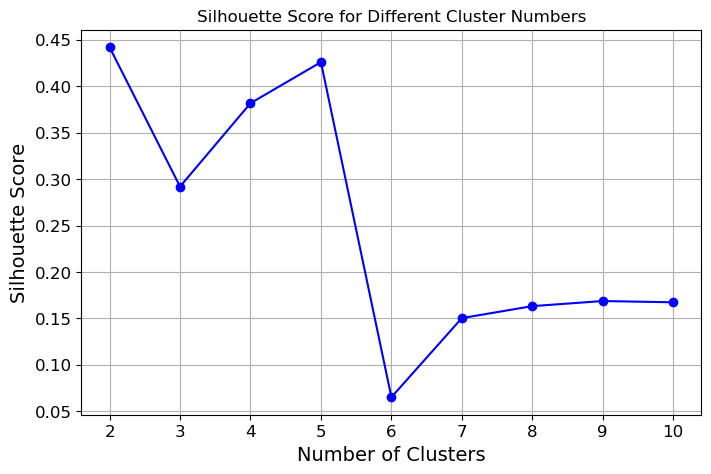

In [73]:
min_clusters = 2
max_clusters = 10

# Initialize empty lists to store the silhouette scores and cluster numbers
silhouette_scores = []
cluster_numbers = list(range(min_clusters, max_clusters + 1))

for n_clusters in cluster_numbers:
    # Calculate the silhouette score using the posterior probabilities
    silhouette_avg = silhouette_score(scores_pca, np.argmax(posterior_probabilities[:, :n_clusters], axis=1))
    silhouette_scores.append(silhouette_avg)
print(silhouette_scores)
# Create a plot to visualize the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_numbers, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.grid(True)
plt.show()


In [47]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scores_pca, np.argmax(posterior_probabilities, axis=1))
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.17


#### The silhouette score is a value between -1 and 1, where:

A score near 1 indicates that the data points are well-clustered and far from neighboring clusters.
A score near 0 suggests that data points are on or very close to the decision boundary between neighboring clusters.
A score near -1 indicates that data points are likely assigned to the wrong clusters.
So, the highest possible silhouette score is 1, which represents perfect clustering, where all data points are well-separated and correctly assigned to their respective clusters. However, achieving a perfect score is rare in real-world data, and a score closer to 1 indicates better clustering quality.

In [48]:
# Compute the most likely cluster for each data point
cluster_assignments = np.argmax(posterior_probabilities, axis=1)

# Calculate statistics for each cluster
cluster_means = []
cluster_variances = []

n_clusters = len(np.unique(cluster_assignments))

for cluster in range(n_clusters):
    cluster_data = scores_pca[cluster_assignments == cluster]
    
    # Calculate mean and variance for each feature in the cluster
    mean = np.mean(cluster_data, axis=0)
    variance = np.var(cluster_data, axis=0)
    
    cluster_means.append(mean)
    cluster_variances.append(variance)

# Print or use cluster means and variances as needed
for cluster in range(n_clusters):
    print(f"Cluster {cluster + 1} - Mean: {cluster_means[cluster]}, Variance: {cluster_variances[cluster]}")

Cluster 1 - Mean: [68.64797194 -5.22000103], Variance: [2640.77944731  887.45781331]
Cluster 2 - Mean: [-106.14228316    0.68752535], Variance: [138.1627234  120.10509511]
Cluster 3 - Mean: [-174.38795328    1.40078011], Variance: [62.7002301   3.15709518]
Cluster 4 - Mean: [193.92248849   9.48469909], Variance: [613.2359109  714.16822538]
Cluster 5 - Mean: [-49.05154414  -2.53300654], Variance: [651.28097713 285.06830618]
Cluster 6 - Mean: [19.70444631  1.85171237], Variance: [7.33566115e+03 1.71859449e+00]
Cluster 7 - Mean: [237.45232156   1.39757238], Variance: [0.01511669 0.01520996]
Cluster 8 - Mean: [231.88124398   5.07844421], Variance: [21.99973233 24.90671486]
Cluster 9 - Mean: [-1.53828478e+02 -3.90878874e-02], Variance: [65.66127439 29.03387947]
Cluster 10 - Mean: [-134.08721994    0.9798086 ], Variance: [60.55820401 58.4334871 ]


##### In this code, we first determine the most likely cluster for each data point using np.argmax(posterior_probabilities, axis=1). Then, we iterate through each cluster to calculate the mean and variance for each feature within that cluster. Finally, we print or use these statistics for further analysis.

This will give you the mean and variance for each feature within each cluster, providing insights into the characteristics of the data within each cluster.

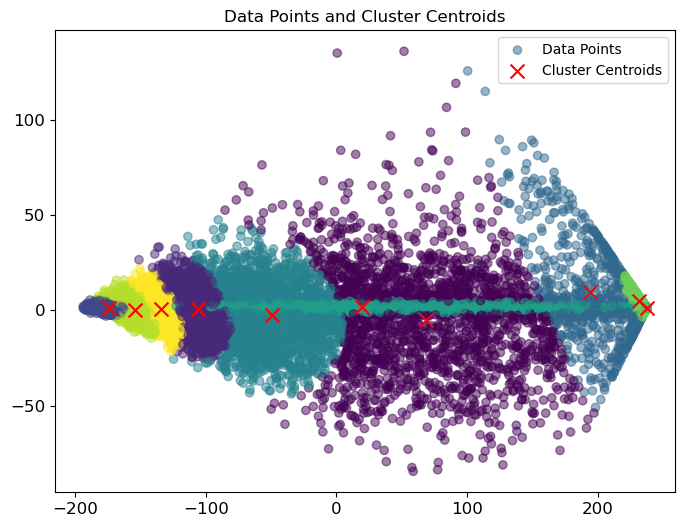

In [49]:
# Compute the most likely cluster for each data point
cluster_assignments = np.argmax(posterior_probabilities, axis=1)

# Calculate statistics for each cluster
cluster_means = []

n_clusters = len(np.unique(cluster_assignments))

for cluster in range(n_clusters):
    cluster_data = scores_pca[cluster_assignments == cluster]
    
    # Calculate mean for each feature in the cluster
    mean = np.mean(cluster_data, axis=0)
    
    cluster_means.append(mean)

# Visualize the data points
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5, label='Data Points')

# Overlay cluster centroids
cluster_means = np.array(cluster_means)
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', marker='x', s=100, label='Cluster Centroids')
plt.legend()

plt.title("Data Points and Cluster Centroids")
plt.show()

[10638.802659459905, 7710.6496313674, 21712.528481210185, 30101.043146447344, 3083.026376660898, 6169.5331662313865, 6930.100268127752, 7672.336754783611, 8422.60975172127]


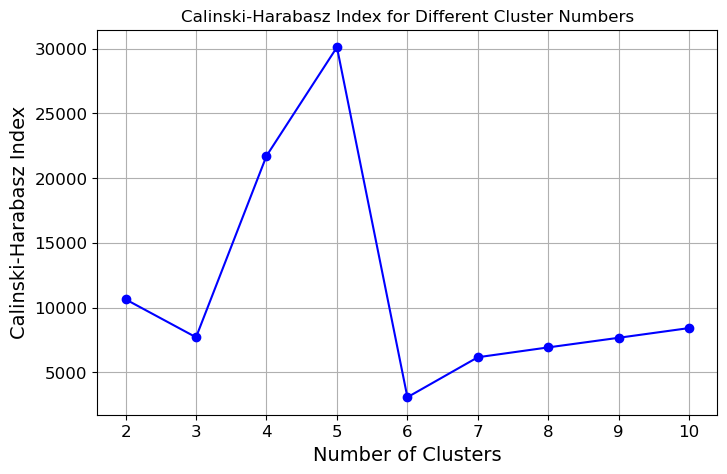

In [76]:
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Initialize empty lists to store the Calinski-Harabasz scores and cluster numbers
calinski_scores = []
cluster_numbers = list(range(min_clusters, max_clusters + 1))

for n_clusters in cluster_numbers:
    # Calculate the Calinski-Harabasz Index using the posterior probabilities
    calinski_index = calinski_harabasz_score(scores_pca, np.argmax(posterior_probabilities[:, :n_clusters], axis=1))
    calinski_scores.append(calinski_index)
print(calinski_scores)
# Create a plot to visualize the Calinski-Harabasz scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_numbers, calinski_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index for Different Cluster Numbers")
plt.grid(True)
plt.show()

Cluster:2------------------------------------
Adjusted Rand Index (ARI): 0.09
Normalized Mutual Information (NMI): 0.11
Fowlkes-Mallows Index (FMI): 0.38
Cluster:3------------------------------------
Adjusted Rand Index (ARI): 0.11
Normalized Mutual Information (NMI): 0.13
Fowlkes-Mallows Index (FMI): 0.37
Cluster:4------------------------------------
Adjusted Rand Index (ARI): 0.07
Normalized Mutual Information (NMI): 0.13
Fowlkes-Mallows Index (FMI): 0.29
Cluster:5------------------------------------
Adjusted Rand Index (ARI): 0.06
Normalized Mutual Information (NMI): 0.13
Fowlkes-Mallows Index (FMI): 0.25
Cluster:6------------------------------------
Adjusted Rand Index (ARI): 0.08
Normalized Mutual Information (NMI): 0.12
Fowlkes-Mallows Index (FMI): 0.25
Cluster:7------------------------------------
Adjusted Rand Index (ARI): 0.06
Normalized Mutual Information (NMI): 0.13
Fowlkes-Mallows Index (FMI): 0.22
Cluster:8------------------------------------
Adjusted Rand Index (ARI): 0.0

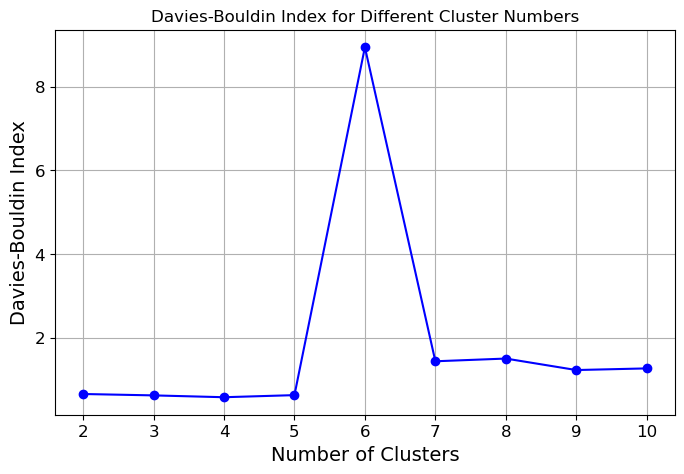

In [75]:
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Initialize an empty list to store the Davies-Bouldin scores
davies_bouldin_scores = []
adjusted_rand_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    # Extract the cluster assignments based on the highest posterior probability
    cluster_assignments = np.argmax(posterior_probabilities[:, :n_clusters], axis=1)
    
    # Calculate the Davies-Bouldin score
    davies_bouldin_score_value = davies_bouldin_score(scores_pca, cluster_assignments)
    #adjusted_rand_score_value=adjusted_rand_score(scores_pca, cluster_assignments)
    davies_bouldin_scores.append(davies_bouldin_score_value)
    #adjusted_rand_scores.append(adjusted_rand_score_value)
    labels_true = Xlabel["0"].values
    ari_score = adjusted_rand_score(labels_true, cluster_assignments)
    nmi_score = normalized_mutual_info_score(labels_true, cluster_assignments)
    fmi_score = fowlkes_mallows_score(labels_true, cluster_assignments)
    print(f"Cluster:{n_clusters}------------------------------------")
    print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")
    print(f"Normalized Mutual Information (NMI): {nmi_score:.2f}")
    print(f"Fowlkes-Mallows Index (FMI): {fmi_score:.2f}")
# Print or visualize the Davies-Bouldin scores
    
# Create a plot to visualize the Calinski-Harabasz scores
print("Davies-Bouldin Scores:", davies_bouldin_scores)
#print(adjusted_rand_scores)
plt.figure(figsize=(8, 5))
plt.plot(cluster_numbers, davies_bouldin_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index for Different Cluster Numbers")
plt.grid(True)
plt.show()

#### In this code, we first calculate the most likely cluster for each data point and then compute the mean (centroid) for each feature within each cluster. We use these cluster centroids to overlay red "x" markers on the scatter plot of the data points. This helps visualize where the centroids are in relation to the data.

In [56]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

# Load ground truth labels (true_labels)
# Calculate scores
labels_true = Xlabel["0"].values
ari_score = adjusted_rand_score(labels_true, cluster_assignments)
nmi_score = normalized_mutual_info_score(labels_true, cluster_assignments)
fmi_score = fowlkes_mallows_score(labels_true, cluster_assignments)

print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.2f}")
print(f"Fowlkes-Mallows Index (FMI): {fmi_score:.2f}")

Adjusted Rand Index (ARI): 0.07
Normalized Mutual Information (NMI): 0.14
Fowlkes-Mallows Index (FMI): 0.20


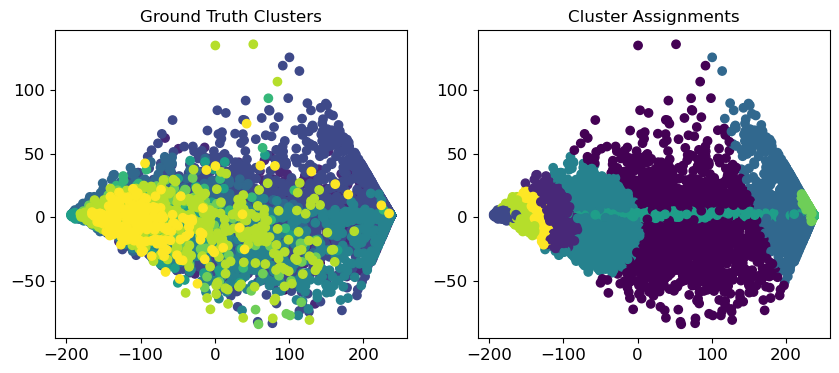

In [78]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=labels_true, cmap='viridis')
plt.title("Ground Truth Clusters")

plt.subplot(122)
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.title("Cluster Assignments")

plt.show()

###### Comparing the clustering results with ground truth, if available, is an essential step in assessing the quality of  clustering. Ground truth provides a reference to evaluate how well  clustering algorithm performed. 

Obtain Ground Truth Labels: If you have access to ground truth labels (true cluster assignments), load or create a vector of these labels. These ground truth labels should represent the actual clusters that your data points belong to.

Compute a Measure of Agreement: You can use metrics like Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), or Fowlkes-Mallows Index (FMI) to measure the agreement between your clustering results and the ground truth. Scikit-learn provides functions for these metrics.
By comparing your clustering results with ground truth labels, you can assess the quality of your clustering algorithm and evaluate whether it correctly identified the underlying structure in your data. High ARI, NMI, and FMI scores, along with visual agreement between the two plots, indicate a strong correspondence between your clustering results and the ground truth.

In [431]:
min_clusters = 2
max_clusters = 10  # Adjust this range as needed

# Load or create your data (X)

best_cluster_number = 2  # Initialize with a default value
best_silhouette_score = -1  # Initialize with a low value

for n_clusters in range(min_clusters, max_clusters + 1):
    # Fit the clustering model (e.g., K-Means) with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Update if the current score is better than the previous best
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_cluster_number = n_clusters

print(f"The optimal number of clusters is {best_cluster_number} with a silhouette score of {best_silhouette_score:.2f}")

/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

The optimal number of clusters is 5 with a silhouette score of 0.34


/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

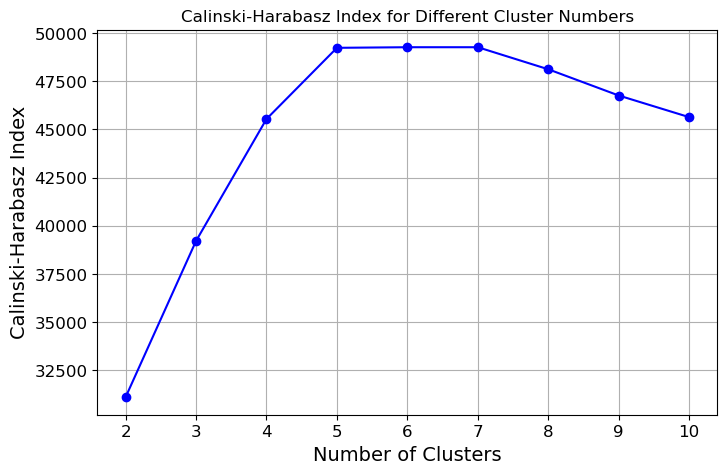

In [18]:

f``luster_numbers, calinski_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index for Different Cluster Numbers")
plt.grid(True)
plt.show()